Group:
* Christina Lindberg
* Johnny Alejandro Agudelo-Hernández
* Adrian Price-Whelan

In [1]:
# Third-party
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

from isochrones.mist import MISTModelGrid

In [2]:
grid = MISTModelGrid(['J', 'H', 'Ks'])

### Goal:

* Show that the color of helium-burning stars gets bluer with decreasing metallicity, redder with increased metallicity

## The "before" figure:

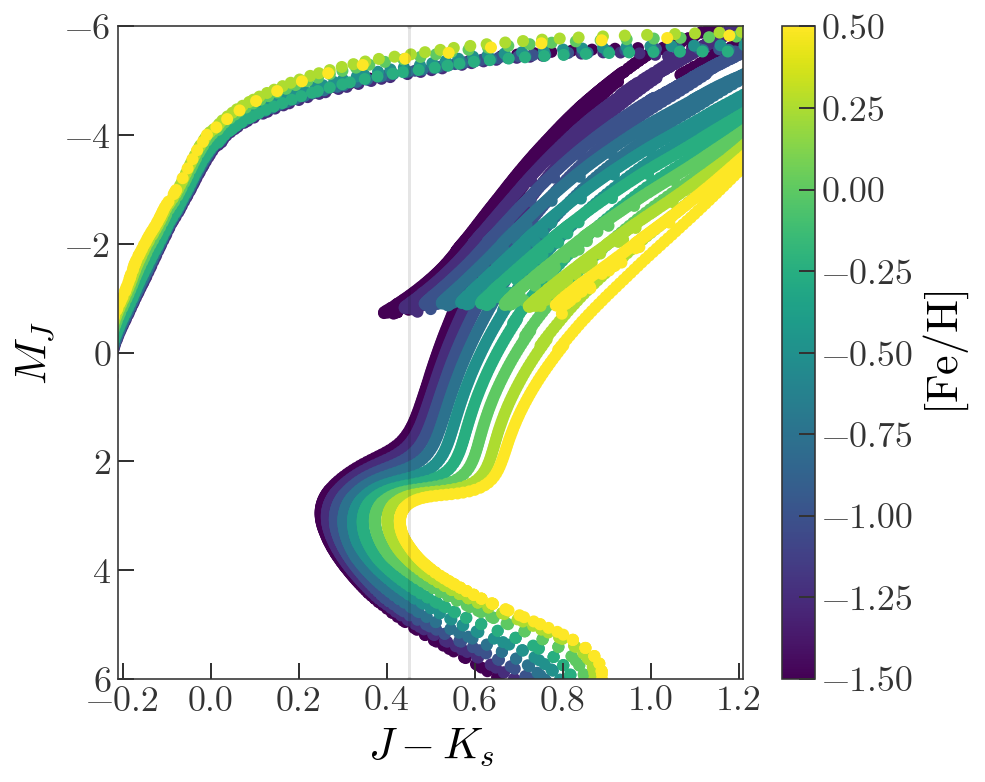

In [3]:
fig,ax = plt.subplots(1, 1, figsize=(7,6))

iso = grid.df[(grid.df['feh'] >= -1.5) & (grid.df['feh'] <= 1) & (grid.df['log10_isochrone_age_yr'] == 10)]
c = ax.scatter(iso['J']-iso['Ks'], iso['J'], c=iso['feh'])
cb = fig.colorbar(c)
cb.set_label(r'$[{\rm Fe}/{\rm H}]$')

ax.xaxis.set_ticks(np.arange(-0.2, 1.2+0.1, 0.2))

ax.axvline(0.45, alpha=0.1)

ax.set_xlim(-0.21, 1.21)
ax.set_ylim(6, -6)

ax.set_xlabel('$J-K_s$')
ax.set_ylabel('$M_J$')

Problems with this initial figure:

* Colorbar confusing / doesn't mean anything. 
* Isochrones are points instead of lines
* Axis limits not set well
* HB stars are not highlighted over other stars

In [9]:
from matplotlib.colors import Normalize, ListedColormap

In [10]:
iso = grid.df[(grid.df['feh'] >= -2) & (grid.df['feh'] <= 1) & 
              (grid.df['log10_isochrone_age_yr'] == 10) & (grid.df['phase'] < 6)]
fehs = np.unique(iso['feh'])
norm = Normalize(vmin=-2., vmax=0.5)

In [11]:
coolwarm = plt.get_cmap('coolwarm')
coolwarm_colors = coolwarm(np.linspace(0, 1, 256))
colors = (coolwarm_colors[:100][::1].tolist() + 
          [[0.8, 0.8, 0.8, 1.]] + 
          coolwarm_colors[-50:][::2].tolist())

In [12]:
mod_coolwarm = ListedColormap(colors, name='modified_coolwarm')
cmap = mod_coolwarm

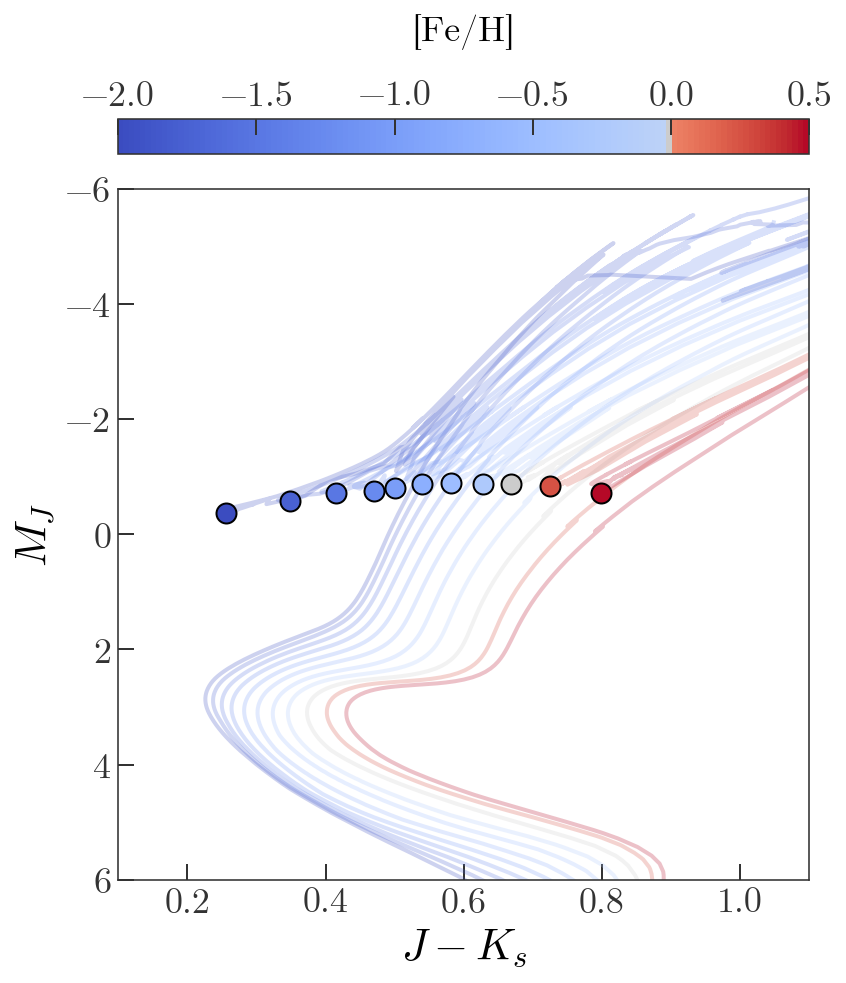

In [13]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

for feh in fehs:
    # if feh == 0: continue
        
    feh_iso = iso[iso['feh'] == feh]
    
    under_iso = feh_iso #[feh_iso['phase'] != 2]
    c = ax.plot(under_iso['J']-under_iso['Ks'], under_iso['J'], linewidth=2.,
                marker='None', linestyle='-', color=cmap(norm(feh)), alpha=0.25)
    
    # phase = 3 is core-helium burning
    HB_feh_iso = feh_iso[feh_iso['phase'] == 3]
    idx = np.array(HB_feh_iso['J']).argmax()

    c = ax.plot((HB_feh_iso['J']-HB_feh_iso['Ks']).iloc[idx], HB_feh_iso['J'].iloc[idx], 
                marker='o', linestyle='none', color=cmap(norm(feh)), 
                markersize=10, markeredgecolor='k', markeredgewidth=1)

ax.xaxis.set_ticks(np.arange(-0.2, 1.2+0.1, 0.2))

ax_cb = fig.add_axes([0.1, 0.94, 0.8, 0.04])
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm,
                               orientation='horizontal')
cb.set_label('[Fe/H]', labelpad=20, fontsize=18)
ax_cb.xaxis.set_ticks_position('top')
ax_cb.xaxis.set_label_position('top')

ax.set_xlim(0.1, 1.1)
ax.set_ylim(6, -6)

ax.set_xlabel('$J-K_s$')
ax.set_ylabel('$M_J$')

fig.set_facecolor('w')